In [162]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [163]:
data = pd.read_csv('Breast_cancer_data.csv')
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [164]:
data.tail()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [165]:
print(data)

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     diagnosis  
0            0  
1            0  
2           

In [166]:
print(data.isnull().sum())

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64


In [167]:
print(data.duplicated().sum())

0


In [168]:
data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [169]:
outliers = pd.DataFrame()
for col in ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    col_outliers = (data[col] < lb) | (data[col] > ub)
    outliers[col] = col_outliers

outliers_any = outliers.any(axis=1)   
data_outliers = data[outliers_any]   
data_proc = data[~outliers_any]     
data_proc

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
...,...,...,...,...,...,...
560,14.05,27.15,91.38,600.4,0.09929,1
561,11.20,29.37,70.67,386.0,0.07449,1
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0


In [170]:
y = data_proc['diagnosis']
data_proc = data_proc.drop(columns = 'diagnosis')
y

0      0
1      0
2      0
4      0
5      0
      ..
560    1
561    1
565    0
566    0
567    0
Name: diagnosis, Length: 533, dtype: int64

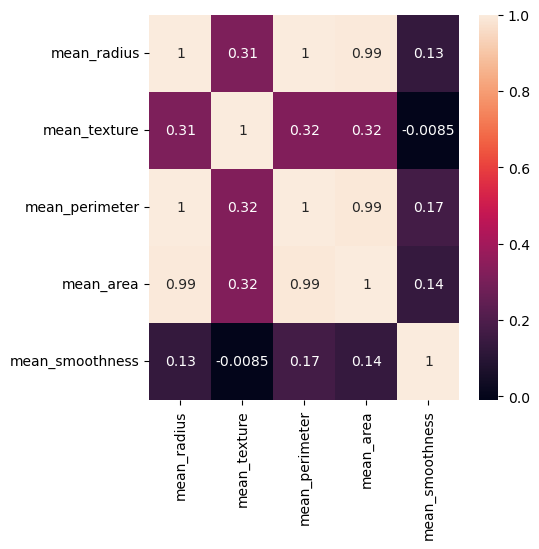

In [241]:
import seaborn as sns
corr_m = data_proc.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr_m, annot=True)
plt.show()

In [171]:
scaler = MinMaxScaler()
scaler.fit(data_proc[['mean_radius']])
data_proc['mean_radius'] = scaler.transform(data_proc[['mean_radius']])

scaler.fit(data_proc[['mean_texture']])
data_proc['mean_texture'] = scaler.transform(data_proc[['mean_texture']])

scaler.fit(data_proc[['mean_perimeter']])
data_proc['mean_perimeter'] = scaler.transform(data_proc[['mean_perimeter']])

scaler.fit(data_proc[['mean_area']])
data_proc['mean_area'] = scaler.transform(data_proc[['mean_area']])

scaler.fit(data_proc[['mean_smoothness']])
data_proc['mean_smoothness'] = scaler.transform(data_proc[['mean_smoothness']])
data_proc.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,0.780282,0.033070,0.790812,0.725159,0.787294
1,0.963144,0.397828,0.891903,1.000000,0.313143
2,0.900773,0.569595,0.862877,0.895983,0.663333
4,0.943299,0.228529,0.913923,0.975476,0.532328
5,0.387625,0.295656,0.388149,0.282114,0.919707


In [172]:
from sklearn.model_selection import train_test_split

In [173]:
x_train, x_test, y_train, y_test = train_test_split(data_proc,y,test_size = 0.25, random_state = 0)


In [174]:
x_train

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
56,0.866752,0.437315,0.817836,0.852854,0.602761
32,0.711532,0.704344,0.690722,0.639154,0.805606
349,0.352187,0.259131,0.334701,0.239493,0.750669
51,0.471968,0.327246,0.434591,0.362199,0.202000
103,0.205188,0.478282,0.201782,0.130909,0.535146
...,...,...,...,...,...
72,0.724289,0.730997,0.704734,0.664609,0.628117
295,0.481182,0.175716,0.443099,0.371416,0.415129
10,0.640655,0.667818,0.589631,0.553319,0.275391
383,0.383372,0.383514,0.368832,0.270106,0.587266


In [175]:
y_train

56     0
32     0
349    1
51     1
103    1
      ..
72     0
295    1
10     0
383    1
200    1
Name: diagnosis, Length: 399, dtype: int64

In [176]:
sse = []
for k in range(1, 10):
    km = KMeans(n_clusters = k)
    km.fit(x_train)
    sse.append(km.inertia_)
sse

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

[84.49107484067191,
 43.879537313852985,
 34.51916962400877,
 28.920061118840124,
 24.818962208751064,
 22.235384041222606,
 20.73017226493308,
 18.459259594578977,
 17.69794463171355]

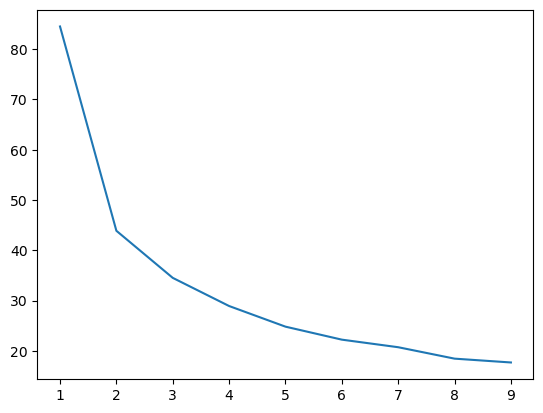

In [177]:
plt.plot(range(1,10), sse)
plt.show()

In [178]:
km = KMeans(n_clusters = 2)
km.fit(x_train)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=2)

In [179]:
clusters = km.labels_
clusters

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [180]:
from sklearn.decomposition import PCA


In [181]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train)
x_pca

array([[ 7.02549815e-01, -1.93663003e-01],
       [ 4.92929275e-01, -6.08174608e-02],
       [-2.35087237e-01, -2.96334402e-01],
       [-6.53620176e-02,  5.30062124e-02],
       [-4.19614386e-01,  3.56689969e-02],
       [-4.23825778e-01, -4.17796827e-02],
       [ 1.40599505e-01,  4.51088966e-01],
       [-1.91768828e-01,  1.76566849e-01],
       [-1.00183514e-01,  1.49006466e-01],
       [ 1.34613164e-01,  3.42914797e-02],
       [ 4.54422968e-02, -1.20810698e-01],
       [-5.43606519e-02,  2.66409727e-02],
       [-7.54414957e-02, -1.08571789e-01],
       [ 1.10991518e-01, -1.19422235e-01],
       [-4.80027802e-01, -3.02099347e-03],
       [-4.35774515e-01, -3.21321006e-01],
       [-1.50340305e-01, -1.13971309e-01],
       [-6.24350647e-01, -2.18211260e-01],
       [ 1.71148034e-01, -5.59287096e-01],
       [ 3.25347484e-01, -8.43190085e-02],
       [-2.68016154e-01,  3.28631818e-02],
       [-3.43010190e-02, -1.47611245e-01],
       [ 8.87314943e-01,  2.41731033e-02],
       [-2.

In [182]:
km = KMeans(n_clusters = 2)
y_pred = km.fit_predict(x_pca[:, [0, 1]])
y_pred

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [183]:
x_pca = np.column_stack((x_pca, y_pred))
x_pca

array([[ 0.70254981, -0.193663  ,  0.        ],
       [ 0.49292928, -0.06081746,  0.        ],
       [-0.23508724, -0.2963344 ,  1.        ],
       ...,
       [ 0.30384732,  0.24148162,  0.        ],
       [-0.16567259, -0.10879445,  1.        ],
       [-0.16999008,  0.04486021,  1.        ]])

In [184]:
df1 = x_pca[x_pca[:, -1] == 0]  
df2 = x_pca[x_pca[:, -1] == 1]
df1

array([[ 0.70254981, -0.193663  ,  0.        ],
       [ 0.49292928, -0.06081746,  0.        ],
       [ 0.17114803, -0.5592871 ,  0.        ],
       [ 0.32534748, -0.08431901,  0.        ],
       [ 0.88731494,  0.0241731 ,  0.        ],
       [ 0.60923523, -0.22552489,  0.        ],
       [ 0.808382  ,  0.00719665,  0.        ],
       [ 0.38749247,  0.10662822,  0.        ],
       [ 0.70978506, -0.19785522,  0.        ],
       [ 0.19097572,  0.13816867,  0.        ],
       [ 0.28813739,  0.11372739,  0.        ],
       [ 1.04265743,  0.01388672,  0.        ],
       [ 0.58142736, -0.0326564 ,  0.        ],
       [ 0.65786597,  0.0442322 ,  0.        ],
       [ 0.2871386 , -0.09171268,  0.        ],
       [ 0.43096928, -0.09642538,  0.        ],
       [ 0.68517968,  0.04443022,  0.        ],
       [ 0.44119176,  0.39986636,  0.        ],
       [ 0.22067202,  0.16970146,  0.        ],
       [ 0.35645112, -0.02639705,  0.        ],
       [ 0.68935893, -0.02448841,  0.   

In [185]:
km.cluster_centers_

array([[ 0.54027615, -0.02045681],
       [-0.1880015 ,  0.00711842]])

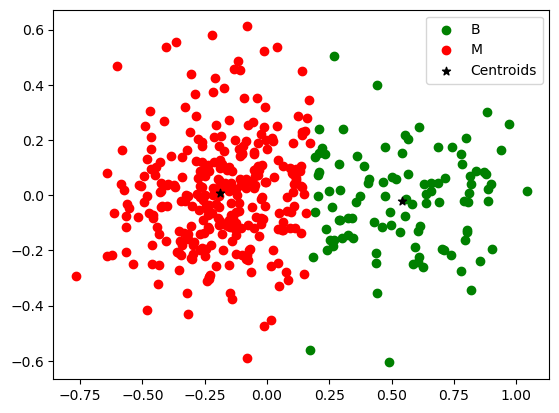

In [186]:
plt.scatter(df1[:,0], df1[:,1], color = 'green', label = 'B')
plt.scatter(df2[:,0], df2[:,1], color = 'red', label = 'M')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1] , color = 'black', label = 'Centroids', marker = '*')
plt.legend()
plt.show()


In [187]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(clusters, y_train)
print(accuracy*100, '%')

90.97744360902256 %


In [188]:
data = pd.read_csv('Breast_cancer_data.csv')
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [219]:
X = data[['mean_radius','mean_texture']]
y = data['diagnosis']
X

,mean_radius,mean_texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [220]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [222]:
X_train

,mean_radius,mean_texture
338,10.050,17.53
427,10.800,21.98
406,16.140,14.86
96,12.180,17.84
490,12.250,22.44
...,...,...
277,18.810,19.98
9,12.460,24.04
359,9.436,18.32
192,9.720,18.22


In [223]:
y_train

338    1
427    1
406    1
96     1
490    1
      ..
277    0
9      0
359    1
192    1
559    1
Name: diagnosis, Length: 455, dtype: int64

In [224]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [225]:
X_train

array([[-1.15036482e+00, -3.90641961e-01],
       [-9.37989720e-01,  6.80514051e-01],
       [ 5.74121002e-01, -1.03333557e+00],
       [-5.47219534e-01, -3.16022104e-01],
       [-5.27397857e-01,  7.91240290e-01],
       [-2.35736051e-01, -1.30774407e+00],
       [-6.71812926e-01, -1.23553131e+00],
       [-4.08467801e-01, -4.46005081e-01],
       [ 3.04407424e-02,  9.54922557e-01],
       [-8.04901323e-01, -1.49068308e+00],
       [ 1.72377822e+00,  1.84795375e+00],
       [-7.05792943e-01, -2.34180971e-01],
       [ 6.44207586e-02, -1.36792138e+00],
       [-7.99237987e-01, -1.47142634e+00],
       [-1.09089979e+00, -6.19315716e-01],
       [-9.20999712e-01,  5.60159443e-01],
       [ 1.10364292e+00,  3.38706964e-01],
       [-1.14186982e+00, -9.73158264e-01],
       [-2.58389396e-01, -8.02254721e-01],
       [-2.83874408e-01,  8.15311212e-01],
       [-7.96406319e-01, -2.31773878e-01],
       [-7.28446287e-01, -2.02987172e+00],
       [ 1.77687479e-01,  1.50855375e+00],
       [ 2.

In [226]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [227]:
y_lin = model.predict(X_test)

In [233]:
y_lin

array([ 0.66977745,  0.57720196,  0.72667398,  0.64687946,  0.75176343,
        0.89943133,  0.7402457 ,  0.85544372,  1.06484076,  1.08704195,
        0.70533799,  0.47884368,  1.00308791,  0.38480946,  0.68062212,
        0.68451008,  1.09949099, -0.13904058,  0.05400253, -0.07919085,
        0.85235242,  0.45479874,  0.81326383,  0.84678765,  0.07827435,
        1.02487726,  1.07002854,  0.59162272,  0.75255353,  0.16546234,
        0.89584   ,  0.08835358,  0.68807231,  0.39777066,  1.19754493,
        0.65758667,  0.76262842,  0.20319613,  0.62140841,  0.39757002,
        0.29870145,  1.19331463,  0.37095128,  1.04361691,  0.6932177 ,
       -0.10785279,  1.2360554 ,  0.59616119,  0.88542636,  0.40442567,
        0.05132989,  0.47602859,  0.18312774,  0.88183208,  0.76897018,
        0.94755475,  0.70484073,  0.5523465 ,  0.77955822, -0.09248858,
        0.59544305,  0.44969187,  1.02269523,  0.81740324,  0.2266894 ,
        0.61547431, -0.10867411, -0.13053868, -0.01387159,  1.01

In [234]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_lin)
mse = mean_squared_error(y_test, y_lin)
r2 = r2_score(y_test, y_lin)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.25741234203659685
Mean Squared Error: 0.09835428065858412
R-squared: 0.5940894787427884


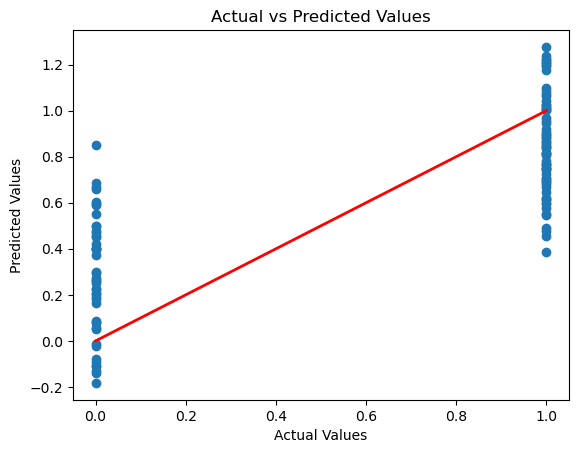

In [238]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_lin)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Diagonal line
plt.show()

In [202]:
X = data[['mean_radius', 'mean_texture']]
y = data['diagnosis']

In [203]:
X

,mean_radius,mean_texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34
...,...,...
564,21.56,22.39
565,20.13,28.25
566,16.60,28.08
567,20.60,29.33


In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [205]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [206]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [207]:
y_log = model.predict(X_test)

In [208]:
y_log

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

In [209]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_log)
print("Accuracy:", accuracy*100, '%')

Accuracy: 89.47368421052632 %


In [210]:
X_test.shape

(114, 2)

In [211]:
X_test = np.column_stack((X_test, y_log))
X_test


array([[-0.20175604,  0.3290786 ,  1.        ],
       [-0.25555773,  1.46763319,  1.        ],
       [-0.02619262, -0.8407682 ,  1.        ],
       [ 0.04176741, -0.23658806,  1.        ],
       [-0.30652775, -0.17641076,  1.        ],
       [-0.78507965, -0.13067601,  1.        ],
       [-0.58403122,  0.85863887,  1.        ],
       [-0.6831396 , -0.0103214 ,  1.        ],
       [-1.80759497,  1.5254034 ,  1.        ],
       [-1.09089979, -1.06944195,  1.        ],
       [ 0.16352914, -1.24515968,  1.        ],
       [ 0.14370746,  1.17156085,  0.        ],
       [-1.33527274,  0.60830129,  1.        ],
       [ 0.77233776,  0.07392683,  0.        ],
       [ 0.1493708 , -0.94186607,  1.        ],
       [ 0.38156758, -1.74824194,  1.        ],
       [-1.43579696, -0.06087033,  1.        ],
       [ 1.81155993,  2.08384878,  0.        ],
       [ 1.5397198 ,  0.97658639,  0.        ],
       [ 1.93332165,  1.06083461,  0.        ],
       [-0.64349625, -0.10901218,  1.   

In [212]:
logdf1 = X_test[X_test[:, -1] == 0]  
logdf2 = X_test[X_test[:, -1] == 1]

In [213]:
logdf1

array([[ 0.14370746,  1.17156085,  0.        ],
       [ 0.77233776,  0.07392683,  0.        ],
       [ 1.81155993,  2.08384878,  0.        ],
       [ 1.5397198 ,  0.97658639,  0.        ],
       [ 1.93332165,  1.06083461,  0.        ],
       [ 0.60243768, -0.09216253,  0.        ],
       [ 2.05508338, -0.97556536,  0.        ],
       [ 1.31884969,  0.54812398,  0.        ],
       [ 1.82854993, -0.33287175,  0.        ],
       [ 0.57978434,  0.574602  ,  0.        ],
       [ 1.38397806, -0.05846324,  0.        ],
       [ 0.27396419,  1.5855807 ,  0.        ],
       [ 0.28812253,  2.56526721,  0.        ],
       [ 0.54014099,  0.98380766,  0.        ],
       [ 2.10888507,  0.77920483,  0.        ],
       [ 0.12105412,  2.01885729,  0.        ],
       [ 1.43211641,  1.35931404,  0.        ],
       [ 0.2116675 ,  0.97658639,  0.        ],
       [ 1.22823631,  0.66366441,  0.        ],
       [ 2.16268676,  0.44221193,  0.        ],
       [ 0.55429933,  0.11966158,  0.   

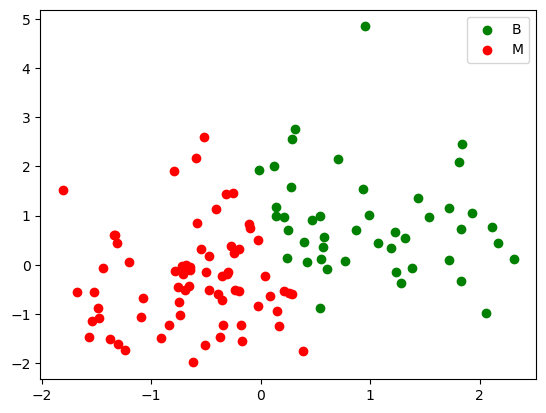

In [216]:


plt.scatter(logdf1[:,0], logdf1[:,1], color = 'green', label = 'B')
plt.scatter(logdf2[:,0], logdf2[:,1], color = 'red', label = 'M')


plt.legend()
plt.show()